In [2]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas as pd
import pylab as plt
import seaborn
import numpy.random as nprnd
import random
import numpy as np

%matplotlib inline

## Problem 1: Define a reward function.

In [185]:
def check_winner(X,player):
    n = len(X)
    winner = None
    scores = []
    for k in range(n):
        if np.sum(X[:,k]) == n or np.sum(X[k,:])==n:
            return 1000*player
        elif np.sum(X[:,k]) == -n or np.sum(X[k,:])==-n:
            return -1000*player
        else:
            scores.append((np.max(np.array((np.sum(X[:,k]),np.sum(X[k,:]))))))
    return np.max(scores)
    

In [186]:
check_winner(X,1)

0.0

In [176]:
def pick_point(i,j,X,player):
    if X[i,j] != 0:
        return X
    else:
        X[i,j] = player
    return X

In [181]:
X[:,0]=1

In [182]:
X

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [178]:
X=pick_point(0,0,X,1)
check_winner(X,1)

1.0
0.0
0.0


1.0

In [64]:
A1 = np.ones(shape=(3,3))/9
A2 = np.ones(shape=(3,3))/9
A1_multi=A1.reshape(9,1)
A2_multi=A2.reshape(9,1)

In [117]:
def softmax(vec):
    vec_mod = np.array(vec[0])[0]
    smax_num = [np.exp(-v) for v in vec]
    smax = np.array([np.exp(-v)/np.sum(smax_num) for v in smax_num])
    return smax[0][0]

In [98]:
softmax(theta1[0])[0][0]

array([0.12262648, 0.12262648, 0.12262648])

In [935]:
def softmax(t):
    return np.exp(-t)/np.sum(np.exp(-t))



In [264]:
def gradient(k,m,R,W,alpha=0.1):
    return R*(W[k,m]-1)

In [290]:
theta1

matrix([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [339]:
X = np.zeros(shape=(3,3))

In [340]:
X

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [547]:
theta1 = np.matrix(np.zeros(shape=(3,3)))
theta2 = np.matrix(np.zeros(shape=(3,3)))
W1 = np.zeros(shape=(3,3))
W2= np.zeros(shape=(3,3))
W1 = softmax(theta1)
W2 = softmax(theta2)
choice_1=(0,0)
choice_2=(0,0)
s_current_1 = 0
s_current_2 = 0
W_multi_coef_1=np.array(W1.reshape(9,1).squeeze())[0]
W_multi_coef_2=np.array(W2.reshape(9,1).squeeze())[0]
found_spot = False
board_full = False
wins_ai = 0.0
wins_computer=0.0
draw=0.0
num_rounds=10

In [555]:
theta_matrix[0]

0.0

In [556]:
theta_matrix = np.zeros(9)

In [557]:
theta_matrix

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [560]:
np.zeros(9)

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [1130]:
def reward(X,player=1.0):
    n = len(X)
    winner = None
    scores = []
    for k in range(n):
        if np.sum(X[:,k]) == 2*n or np.sum(X[k,:])== 2*n or X[0,0]+X[1,1]+X[2,2]==6:
            return 100
        elif np.sum(X[:,k]) == -2*n or np.sum(X[k,:])==-2*n or X[0,0]+X[1,1]+X[2,2]==-6:
            return -100
        else:
            return 0
def softmax(theta_matrix, state, action):
    t = np.dot(theta_matrix[action],state)

    denom = np.sum([np.exp(-np.dot(theta_matrix[a],state)) for a in range(9)])
   
    return np.exp(-t)/denom  
def get_indices(a):
    return a /3, a % 3



Our state is given by

$$\pi(a \lvert x) = \frac{e^{-\theta_a \cdot x}}{\sum_{a} e^{-\theta_a \cdot x}},$$

where $a \in \mathbb{N}^9$ and $a_j = 1$ if and only if player chooses position $j$ on board, and $x \in \mathbb{R}^9$ satisfies $x_j = 1$ if we chose position $j$ as an $x$, $x_j=-1$ if computer chose position $j$ as an O and is $0$ otherwise. 

In [1131]:
theta_matrix = np.zeros(9,dtype=object)
X = np.zeros(shape=(3,3))
PI = np.zeros(9,dtype=object)
state = X.reshape(9,1).squeeze()
for a in range(9):
    theta_matrix[a] = np.zeros(9)
for a in range(9):
    PI[a] = softmax(theta_matrix,state,a)

In [1197]:
theta_matrix = np.zeros(9,dtype=object)
X = np.ones(shape=(3,3))
PI = np.zeros(9,dtype=object)
state = X.reshape(9,1).squeeze()


for a in range(9):
    theta_matrix[a] = np.zeros(9)
for a in range(9):
    PI[a] = softmax(theta_matrix,state,a)


In [1006]:
PI

array([0.2633082801664112, 0.4011424604373771, 0.23483557471803587,
       0.012192732889478574, 0.0007010871692051022, 0.0014937182400162037,
       0.07562292836667936, 0.006766511409856995, 0.0039367066029394],
      dtype=object)

In each round, first choose  $a(t) = \textrm{argmax}_a \pi (a \lvert x(t))$, then

$$ \theta_{a(t)} = \theta_{a(t-1)} + \nu \nabla_{\theta_a} \mathbb{E}[R_t \lvert x_t, ],$$

which is easily seen to be

$$ \theta_{a(t)} = \theta_{a(t-1)} + \nu \; R(t) \; \pi \left (a(t) \;\lvert\;  x(t)\right) \;(1 - \pi(a(t)  \;\lvert\; x(t))) \;x(t),$$


In [1207]:
theta_matrix = np.zeros(9,dtype=object)
X = np.ones(shape=(3,3))
PI = np.zeros(9,dtype=object)
state = X.reshape(9,1).squeeze()


for a in range(9):
    theta_matrix[a] = np.zeros(9)
for a in range(9):
    PI[a] = softmax(theta_matrix,state,a)


wins_ai = 0.0
wins_computer=0.0
draw=0.0
num_rounds=10000
choice_1=(1,1)
choice_2=(1,0)
available_indices = [0,1,2,3,4,5,6,7,8]

winner = False 
first_moves=[]
win_num_ai=[]
win_num_computer=[]
draw_num = []

for games in range(num_rounds):
    
    X = np.ones(shape=(3,3))

    found_spot = False
    board_full = False
    winner=False
    state = X.reshape(9,1).squeeze()

    for a in range(9):
        PI[a] = softmax(theta_matrix,state,a)
        
    for rounds in range(9):
        while board_full == False and found_spot == False:
            a_next_1 = np.where(np.random.multinomial(1, np.array(PI,dtype=float), size=1)==1)[1][0]
            choice_1=get_indices(a_next_1)
            if X[choice_1] == 1:
                if rounds == 0:
                    first_moves.append(a_next_1)

                X[choice_1]=-2
                state = X.reshape(9,1).squeeze()
                R = reward(X,1)
                if R == 100:
                    wins_ai += 1.0
                    board_full=True
                    winner=True
    
                    theta_matrix[a_next_1] = theta_matrix[a_next_1] - 0.001*PI[a_next_1]*(PI[a_next_1]-1)*state*R
                
                    for a in range(9):
                        PI[a] = softmax(theta_matrix,state,a)

                if len(np.where(X == 1)[0])==0 and winner==False:
                    if R != 100 and R != -100:
                        draw += 1.0
                    board_full=True
                found_spot=True
        found_spot=False
        while board_full == False and found_spot==False:
            a_next_2 = np.random.randint(0,9) 
            choice_2=get_indices(a_next_2)
            if X[choice_2]==1:
                X[choice_2]=2
                state = X.reshape(9,1).squeeze()
                R = reward(X,-1)
                if R == -100:
                    board_full=True
                    winner=True
                    wins_computer += 1.0
                   
                    theta_matrix[a_next_2] = theta_matrix[a_next_2] - 0.001*PI[a_next_2]*(PI[a_next_2]-1)*state*R
                    for a in range(9):
                        PI[a] = softmax(theta_matrix,state,a)
                        
                if len(np.where(X==1)[0])==0 and winner==False:
                    if R != 100 and R != -100:
                        draw += 1.0
                        board_full=True
                        
                    board_full=True
                found_spot=True
        found_spot=False
    win_num_ai.append(float(wins_ai)/(games+1))
    draw_num.append(float(draw)/(games+1))
    win_num_computer.append(float(wins_computer)/(games+1))
    
print ("You won {0} % of the time").format(100*float(wins_ai)/num_rounds)
print ("Computer won {0} % of the time").format(100*float(wins_computer)/num_rounds)
print ("Draw {0} % of the time").format(100*float(draw)/num_rounds)

You won 24.49 % of the time
Computer won 2.89 % of the time
Draw 57.16 % of the time


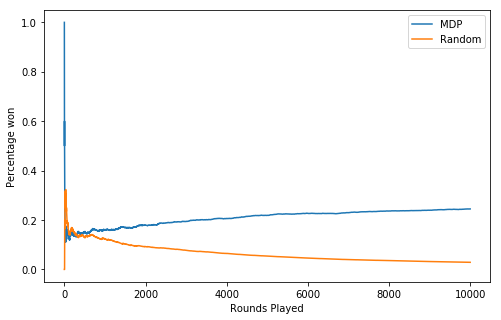

In [1208]:
plt.figure(figsize=(8,5))
plt.xlabel('Rounds Played')
plt.ylabel('Percentage won')
plt.plot(win_num_ai,label='MDP')
plt.plot(win_num_computer,label='Random')
plt.legend()
#plt.plot(draw_num)

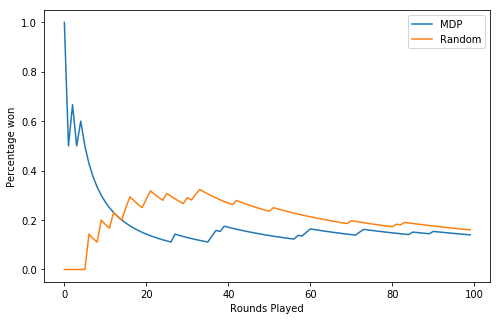

In [1209]:
plt.figure(figsize=(8,5))
plt.xlabel('Rounds Played')
plt.ylabel('Percentage won')
plt.plot(win_num_ai[0:100],label='MDP')
plt.plot(win_num_computer[0:100],label='Random')
plt.legend()

In [3]:
import mdptoolbox

In [4]:
import mdptoolbox.example
P, R = mdptoolbox.example.forest()
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()
vi.policy # result is (0, 0, 0)

(0, 0, 0)

In [ ]:
X = np.ones(shape=(3,3))
state = X.reshape(9,1).squeeze()

for a in range(9):
        PI[a] = softmax(theta_matrix,state,a)
pd.DataFrame(np.array(PI,dtype=float)).plot(kind='bar')

In [1180]:
theta_matrix

array([array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
       array([ 5.55331604, -5.55331604, -1.9877953 ,  1.07650377,  1.45355026,
       -3.34783391,  1.02777827, -4.31151649,  1.57355444]),
       array([ 5.30201764, -2.20314241, -5.30201764,  1.82822857,  0.68459382,
       -3.36139419,  1.46374184, -3.57640594,  0.76107608]),
       array([ 6.90320233,  3.01607974,  3.08905176, -6.90320233,  0.29945165,
       -4.40699524, -3.33981047, -4.50700128,  0.36640455]),
       array([ 7.45481655,  3.20114934,  3.35567585,  0.27715934, -7.45481655,
       -4.88727315,  1.01246946, -4.59478178, -4.3420265 ]),
       array([ 8.24964776,  1.92447958,  1.99313043, -0.72974341, -1.53204204,
       -8.24964776, -0.4422125 , -5.67874497, -1.50547919]),
       array([ 6.95893326,  3.18129043,  2.9074557 , -3.22278865,  0.20262502,
       -4.34783408, -6.95893326, -4.39924521,  0.08410538]),
       array([ 8.56037406,  1.89055436,  1.94667423, -0.76273223, -1.5520537 ,
       -5.84294714, -0.691548

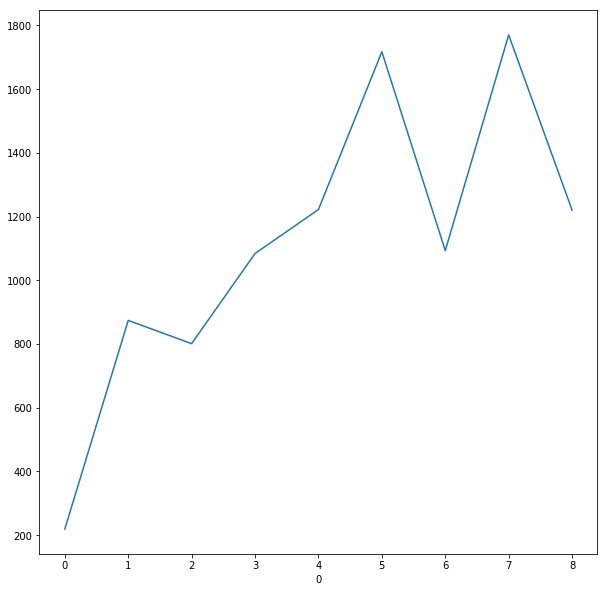

In [1179]:
plt.figure(figsize=(10,10))
pd.DataFrame(first_moves).groupby(0).size().plot()

In [1106]:
len(df_first_points)

10000

<Figure size 1080x720 with 0 Axes>

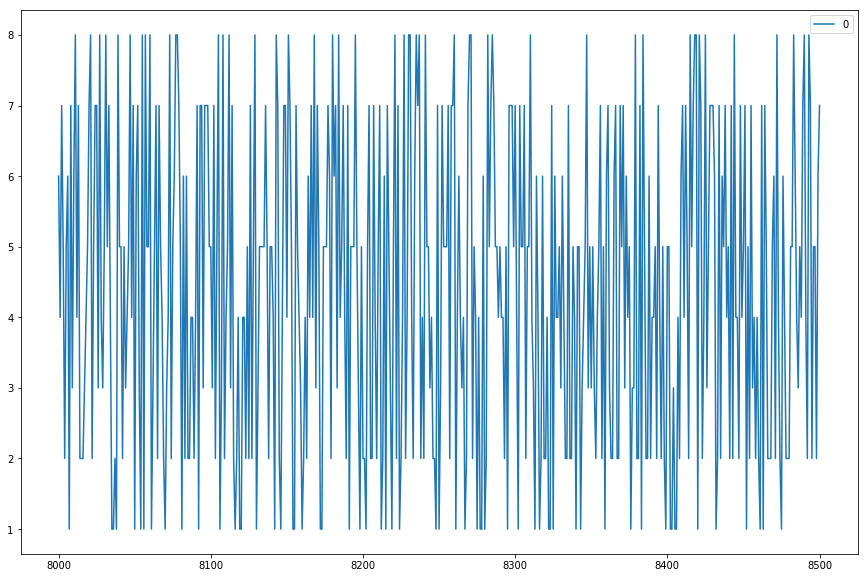

In [1175]:
plt.figure(figsize=(15,10))
df_first_points=pd.DataFrame(first_moves)
df_first_points.loc[8000:8500].plot(figsize=(15,10))

In [1176]:
df_first_points.describe()

,0
count,10000.000000
mean,4.352200
std,2.335059
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,8.000000


In [1089]:
PI

array([0.19299651341287632, 0.31947247811654184, 0.001749553269802685,
       0.0026063843991975854, 0.00525913285910728, 0.0002356295103071814,
       0.21739368490389438, 0.2575768065133908, 0.002709817014882125],
      dtype=object)

In [930]:
0%3

0

In [912]:
np.argmax(PI)

0

In [926]:
PI

array([0.09692641438616133, 0.11637076392718153, 0.11752569648623734,
       0.11463619143852828, 0.10961769135706133, 0.10693662413715196,
       0.1221906909931562, 0.12031652275542264, 0.09547940451909935],
      dtype=object)

In [889]:
np.where(np.random.multinomial(1, np.array(PI,dtype=float), size=1)==1)[1][0]

ValueError: sum(pvals[:-1]) > 1.0

In [820]:
X = np.zeros(shape=(3,3))
theta_matrix = np.zeros(9,dtype=object)
X = np.zeros(shape=(3,3))
PI = np.zeros(9,dtype=object)
state = X.reshape(9,1).squeeze()


for a in range(9):
    theta_matrix[a] = np.zeros(9)
for a in range(9):
    PI[a] = softmax(theta_matrix,state,a)

    
wins_ai = 0.0
wins_computer=0.0
draw=0.0
num_rounds=1000
choice_1=(0,0)
choice_2=(1,0)

found_spot = False
board_full = False
for rounds in range(9):
        while board_full == False and found_spot==False:
            a_next_2 = np.random.randint(0,9) 
            choice_2=get_indices(a_next_2)
            if X[choice_2]==0:
                print ('computer chooses {0},{1}').format(choice_2[0],choice_2[1])
                X[choice_2]=-1
                state = X.reshape(9,1).squeeze()
                R = reward(X,-1)
                if R == -100:
                    #print (X)
                    print (round)
                    print ('Computer won at round {0}!').format(rounds)
                    board_full=True
                    wins_computer += 1.0
                    for i in range(9):
                        theta_matrix[i] = theta_matrix[i] + 0.001*PI[i]*(PI[i]-1)*state*R
                    for a in range(9):
                        PI[a] = softmax(theta_matrix,state,a)
                if len(np.where(X==0)[0])==0:
                    print ("Game ended in a draw")
                    if R != 1000 and R != -1000:
                        draw += 1.0
                        board_full=True
                    board_full=True
                found_spot=True
        found_spot=False
        while board_full == False and found_spot == False:
            a_next_1 = np.where(np.random.multinomial(1, np.array(PI,dtype=float), size=1)==1)[1][0]
            choice_1=get_indices(a_next_1)
            if X[choice_1] == 0:
                print ('shitty AI chooses {0},{1}').format(choice_1[0],choice_1[1])
                X[choice_1]=1
                state = X.reshape(9,1).squeeze()
                R = reward(X,1)
                if R == 100:
                    print ('You won after {0} steps!').format(rounds)
                    wins_ai += 1.0
                    board_full=True
                    break
                for i in range(9):
                    theta_matrix[i] = theta_matrix[i] + 0.001*PI[i]*(PI[i]-1)*state*R
                for a in range(9):
                    PI[a] = softmax(theta_matrix,state,a)
                if len(np.where(X == 0)[0])==0:
                    print ("Game ended in a draw")
                    if R != 1000 and R != -1000:
                        draw += 1.0
                    board_full=True
                found_spot=True

        found_spot=False
        

computer chooses 1,0
shitty AI chooses 0,0
computer chooses 1,2
shitty AI chooses 0,2
computer chooses 2,0
shitty AI chooses 0,1
You won after 2 steps!


In [823]:
X

array([[ 1.,  1.,  1.],
       [-1.,  0., -1.],
       [-1.,  0.,  0.]])

In [821]:
theta_matrix

array([array([-0.0002963 ,  0.        , -0.00019753,  0.0002963 ,  0.        ,
        0.00019753,  0.        ,  0.        ,  0.        ]),
       array([-0.0002963 ,  0.        , -0.00019753,  0.0002963 ,  0.        ,
        0.00019753,  0.        ,  0.        ,  0.        ]),
       array([-0.0002963 ,  0.        , -0.00019753,  0.0002963 ,  0.        ,
        0.00019753,  0.        ,  0.        ,  0.        ]),
       array([-0.0002963 ,  0.        , -0.00019753,  0.0002963 ,  0.        ,
        0.00019753,  0.        ,  0.        ,  0.        ]),
       array([-0.0002963 ,  0.        , -0.00019753,  0.0002963 ,  0.        ,
        0.00019753,  0.        ,  0.        ,  0.        ]),
       array([-0.0002963 ,  0.        , -0.00019753,  0.0002963 ,  0.        ,
        0.00019753,  0.        ,  0.        ,  0.        ]),
       array([-0.0002963 ,  0.        , -0.00019753,  0.0002963 ,  0.        ,
        0.00019753,  0.        ,  0.        ,  0.        ]),
       array([-0.000

In [773]:
choice_2

(2, 0)

In [619]:
np.where(np.random.multinomial(1, np.array(PI,dtype=float), size=1)==1)[1][0]

2

In [618]:
np.array(PI,dtype=float)

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [546]:
theta1

matrix([[-24.16042492, -12.76213006, -17.20038981],
        [-31.73127826, -16.55448674,   7.35617827],
        [ 25.4749356 ,  47.64144222,  21.93615369]])

In [498]:
X

array([[-1.,  1., -1.],
       [ 1., -1., -1.],
       [ 1.,  1.,  1.]])

In [485]:
X

array([[ 1., -1., -1.],
       [ 1.,  1.,  1.],
       [-1., -1.,  1.]])

In [445]:
X = np.zeros(shape=(3,3))


In [446]:
X

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [399]:
found_spot

True

In [349]:
X[0,0]

-1.0

In [345]:
X

array([[-1., -1.,  1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

In [313]:
W1

matrix([[1.59279833e-02, 2.22164908e-03, 2.22164908e-03],
        [2.22164908e-03, 1.02893062e-01, 2.22164908e-03],
        [2.54127277e-01, 6.18145658e-01, 1.94222544e-05]])

In [ ]:
# Context is the current board configuration so 

We seek to maximize:
$$ \mathbb{E}(R_t \lvert a_t, s_t)$$

where $a_t$ is the point we choose on the board and $s_t$ is the given board configruation.